# Using the Data
Now that we have all the Americredit Automobile Receivables Trust 2019-1 (AMCAR 2019-1) files saved down, we will analyze the data. <br>
How do subvented loans peroform compared and what does that pool look like?

In [1]:
#import modules
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from csv import reader

In [2]:
#set up path to import CSV files and get a lsit of files. update CIK number if necessary
CIK='0001765880'
path='SEC/'+str(CIK)+'/'
csvfiles=[file for file in os.listdir('sec/'+CIK) if file.endswith(".csv")]

In [3]:
#import CSV for dtype dictionary, saved in a CSV file
file4='Column and DTYPE - Test.csv' #note: using test file to reduce the size. Was getting memory issues due to size
dtypes= pd.read_csv(file4, index_col=0, header=None, squeeze=True).to_dict()
columns=list(dtypes.keys())
#date columns need to be parsed separately
datecols=['reportingPeriodBeginningDate','reportingPeriodEndingDate','originationDate','loanMaturityDate','originalFirstPaymentDate']

In [4]:
#import text for CIK and trust name dictionary. text file was better than CSV because leading 0s in CIK were deleted each time CSV was opened
file5='CIK and Trust Name.txt'
trustnamedict = {k: str(v) for k, v in reader(open(file5), delimiter=',')}
print(trustnamedict)

{'0001787489': 'WOSAT 2019-A', '0001765880': 'AMCAR 2019-1'}


In [5]:
#import all CSV files into single dataframe named frame
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    #df = pd.read_csv(filename, index_col=None, header=0, dtype=dtypes, usecols=columns, parse_dates=datecols)
    df = pd.read_csv(filename, index_col=None, header=0, usecols=columns, parse_dates=datecols)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [6]:
#define function that will optimize datatype and execute. There are many rows of data
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
reduce_mem_usage(frame)

Memory usage of dataframe is 256.74 MB
Memory usage after optimization is: 256.74 MB
Decreased by 0.0%


,assetNumber,reportingPeriodBeginningDate,reportingPeriodEndingDate,originationDate,originalLoanTerm,loanMaturityDate,originalInterestRatePercentage,originalFirstPaymentDate,gracePeriodNumber,subvented,...,obligorGeographicLocation,remainingTermToMaturityNumber,reportingPeriodBeginningLoanBalanceAmount,nextReportingPeriodPaymentAmountDue,reportingPeriodActualEndBalanceAmount,totalActualAmountPaid,currentDelinquencyStatus,chargedoffPrincipalAmount,paymentExtendedNumber,repossessedIndicator
0,0001765880 - 000001,2019-01-01,2019-01-31,2013-12-01,74,2020-01-01,0.1490,2014-02-01,2,0,...,IL,12,7432.34,629.27,6897.13,629.27,0.0,0.0,0,False
1,0001765880 - 000002,2019-01-01,2019-01-31,2013-12-01,74,2020-09-01,0.0990,2014-02-01,2,1,...,IL,20,9002.16,793.98,8588.55,567.00,18.0,0.0,2,False
2,0001765880 - 000003,2019-01-01,2019-01-31,2013-12-01,68,2019-11-01,0.1745,2014-02-01,2,0,...,NH,10,2210.81,483.19,2210.81,0.00,18.0,0.0,0,False
3,0001765880 - 000004,2019-01-01,2019-01-31,2013-12-01,62,2019-05-01,0.0845,2014-02-01,2,0,...,MN,4,1135.63,215.95,929.94,215.95,0.0,0.0,0,False
4,0001765880 - 000005,2019-01-01,2019-01-31,2013-12-01,73,2020-06-01,0.1290,2014-01-01,1,1,...,TX,17,13339.18,822.30,12498.29,1100.00,31.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359636,0001765880 - 062802,2020-12-01,2020-12-31,2019-01-01,74,2025-02-01,0.1599,2019-03-01,2,0,...,NJ,50,6065.23,301.70,6065.23,0.00,17.0,0.0,0,False
1359637,0001765880 - 062803,2020-12-01,2020-12-31,2019-01-01,73,2025-01-01,0.1055,2019-02-01,1,0,...,CA,49,11144.44,517.26,10917.47,284.79,8.0,0.0,0,False
1359638,0001765880 - 062806,2020-12-01,2020-12-31,2019-01-01,74,2025-02-01,0.1163,2019-03-01,2,0,...,UT,50,21468.33,542.78,21261.48,541.12,0.0,0.0,0,False
1359639,0001765880 - 062808,2020-12-01,2020-12-31,2019-01-01,74,2025-02-01,0.1455,2019-03-01,2,0,...,CA,50,15191.30,401.75,14964.69,401.75,0.0,0.0,0,False


In [7]:
#define a function that calculates CDR. DF is the name of the dataframe used
def CDRCalc(DF):
    a=DF['chargedoffPrincipalAmount'].sum()
    b=DF['reportingPeriodBeginningLoanBalanceAmount'].sum()
    return (1-pow((1-a/b),12))*100

#define a function that calculates CDR based on two groupings (one for the total and one for a different grouping)
def CDRCalctotal(DF,group1,group2):
    a=pd.DataFrame(DF.groupby(group1).apply(CDRCalc).rename('Total'))
    b=DF.groupby([group1,group2]).apply(CDRCalc).unstack(level=1)
    return pd.concat([a,b], axis=1)
    return b

In [8]:
#use np.where to tag 'not subvented' if row ==0, 'subvented' otherwise
subvented = np.where(frame['subvented'] == 0 , 'Not Subvented', 'Subvented')
CDRs=CDRCalctotal(frame,'reportingPeriodEndingDate',subvented)

<AxesSubplot:title={'center':'AMCAR 2019-1 CDR over time'}, xlabel='reportingPeriodEndingDate'>

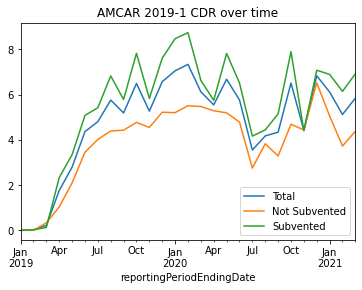

In [9]:
#plot the values
CDRs.plot(kind='line', title=trustnamedict.get(CIK)+" CDR over time")

<AxesSubplot:title={'center':'AMCAR 2019-1 CDR over time'}, xlabel='reportingPeriodEndingDate'>

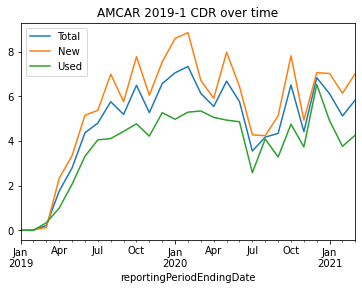

In [11]:
#use np.where to tag 'new' if row ==1, 'used' otherwise
newused = np.where(frame['vehicleNewUsedCode'] == 1 , 'New', 'Used')
CDRs=CDRCalctotal(frame,'reportingPeriodEndingDate',newused)
#plot the values
CDRs.plot(kind='line', title=trustnamedict.get(CIK)+" CDR over time")

<AxesSubplot:title={'center':'AMCAR 2019-1 CDR over time'}, xlabel='reportingPeriodEndingDate'>

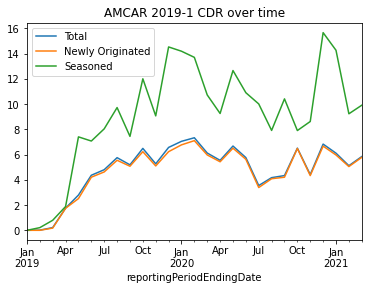

In [35]:
#use np.where to tag 'seasoned' if originated before 3/1/2018, 'newly originated' otherwise
from datetime import datetime
seasoned = np.where(frame['originationDate'] <= datetime(2018,3,1) , 'Seasoned', 'Newly Originated')
CDRs=CDRCalctotal(frame,'reportingPeriodEndingDate', seasoned)
#plot the values
CDRs.plot(kind='line', title=trustnamedict.get(CIK)+" CDR over time")